In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [3]:
df = pd.read_csv('C:\\Users\\hp\\Downloads\\homicide_by_countries.csv')

In [5]:
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [6]:
df.shape

(195, 6)

In [8]:
df.isnull().sum()

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [10]:
df.dtypes

Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object

changing data type

In [11]:
my_data=['Rate','Count','Year']
for i in my_data:
    print(i)
    df[i]=df[i].astype(int)

Rate
Count
Year


In [12]:
df.dtypes

Location     object
Region       object
Subregion    object
Rate          int32
Count         int32
Year          int32
dtype: object

In [14]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [13]:
desc=df.sort_values('Count',ascending = False).reset_index(drop=True)
desc

,Location,Region,Subregion,Rate,Count,Year
0,Brazil,Americas,South America,22,47722,2020
1,Nigeria,Africa,Western Africa,22,44200,2019
2,India,Asia,Southern Asia,3,40651,2020
3,Mexico,Americas,Central America,28,36579,2020
4,United States,Americas,Northern America,6,21570,2020
...,...,...,...,...,...,...
190,Holy See,Europe,Southern Europe,0,0,2015
191,Channel Islands,Europe,Northern Europe,0,0,2010
192,Saint Helena,Africa,Western Africa,0,0,2009
193,San Marino,Europe,Southern Europe,0,0,2011


In [6]:
df1 = df[['Location','Count']].sort_values(by = 'Count', ascending =False).head(5)
df1['Perc'] = (df1['Count']*100 / df1['Count'].sum())
df1

,Location,Count,Perc
26,Brazil,47722,25.021759
125,Nigeria,44200,23.175093
78,India,40651,21.314269
111,Mexico,36579,19.179224
186,United States,21570,11.309655


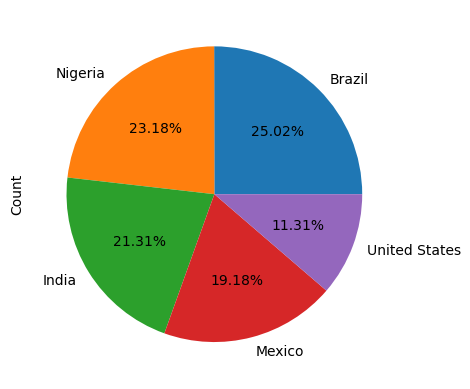

In [7]:
df1.plot(x = 'Location', y= 'Count' ,kind = 'pie',labels = df1.Location)
plt.legend().set_visible(False)

In [8]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015


In [5]:
df2 = df.groupby('Region')['Count'].sum().sort_values(ascending = False)
df2

Region
Americas    153597
Asia        105552
Africa       99481
Europe       19869
Oceania        347
Name: Count, dtype: int64

<Axes: xlabel='Region'>

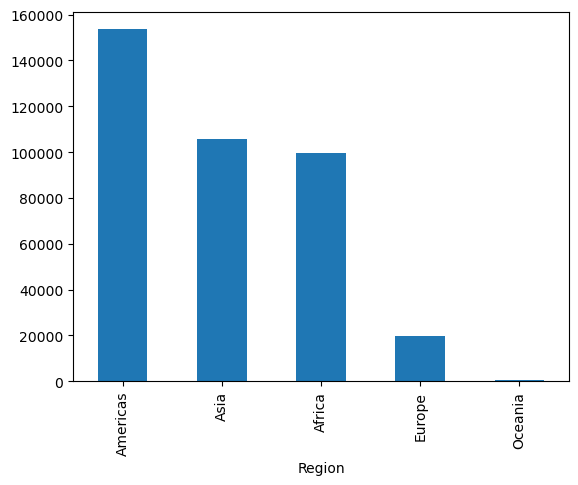

In [6]:
df2.plot(kind ='bar')

In [7]:
df3 = df.groupby('Subregion')['Count'].sum()
df3

Subregion
Australia, New Zealand      347
Caribbean                  5037
Central America           47371
Central Asia               1406
Eastern Africa            23669
Eastern Asia               8563
Eastern Europe            14604
Middle Africa              2477
Northern Africa            5538
Northern America          22317
Northern Europe            2097
South America             78872
South-Eastern Asia        25314
Southern Africa           21479
Southern Asia             58631
Southern Europe            1093
Western Africa            46318
Western Asia              11638
Western Europe             2075
Name: Count, dtype: int64

In [8]:
df3.index

Index(['Australia, New Zealand', 'Caribbean', 'Central America',
       'Central Asia', 'Eastern Africa', 'Eastern Asia', 'Eastern Europe',
       'Middle Africa', 'Northern Africa', 'Northern America',
       'Northern Europe', 'South America', 'South-Eastern Asia',
       'Southern Africa', 'Southern Asia', 'Southern Europe', 'Western Africa',
       'Western Asia', 'Western Europe'],
      dtype='object', name='Subregion')

In [9]:
df3.values

array([  347,  5037, 47371,  1406, 23669,  8563, 14604,  2477,  5538,
       22317,  2097, 78872, 25314, 21479, 58631,  1093, 46318, 11638,
        2075], dtype=int64)

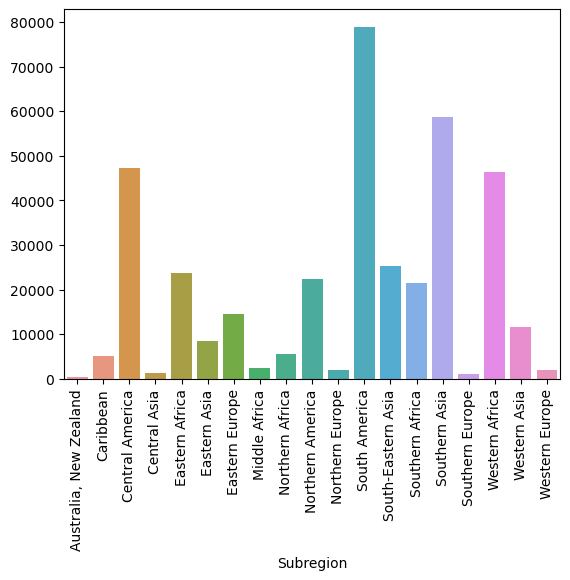

In [16]:
sns.barplot(x=df3.index ,y= df3.values)
plt.xticks(rotation= 'vertical')
xlabel = None

In [17]:
df.Year.value_counts

<bound method IndexOpsMixin.value_counts of 0      2018
1      2020
2      2020
3      2020
4      2012
       ... 
190    2018
191    2011
192    2013
193    2015
194    2012
Name: Year, Length: 195, dtype: int64>

In [4]:
df[df['Region'].isin(['Asia','Europe'])]

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
8,Armenia,Asia,Western Asia,1.8,52,2020
11,Austria,Europe,Western Europe,0.7,65,2020
...,...,...,...,...,...,...
183,United Arab Emirates,Asia,Western Asia,0.7,64,2019
184,United Kingdom,Europe,Northern Europe,1.1,755,2018
189,Uzbekistan,Asia,Central Asia,1.2,396,2019
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011


In [8]:
df4 = df[(df['Region'] == 'Asia')| (df['Region'] == 'Europe')]
df4

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
8,Armenia,Asia,Western Asia,1.8,52,2020
11,Austria,Europe,Western Europe,0.7,65,2020
...,...,...,...,...,...,...
183,United Arab Emirates,Asia,Western Asia,0.7,64,2019
184,United Kingdom,Europe,Northern Europe,1.1,755,2018
189,Uzbekistan,Asia,Central Asia,1.2,396,2019
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011


In [11]:
df5 = df4[df4['Year']>2016][['Region','Year','Count']]
df5

,Region,Year,Count
0,Asia,2018,2474
1,Europe,2020,61
3,Europe,2020,2
8,Asia,2020,52
11,Europe,2020,65
...,...,...,...
178,Asia,2020,2095
182,Europe,2017,2751
183,Asia,2019,64
184,Europe,2018,755


In [12]:
df6 = df5.groupby(['Region','Year']).sum()['Count']
df6

Region  Year
Asia    2017     1787
        2018    16923
        2019     6458
        2020    53516
        2021    15299
Europe  2017     3670
        2018      883
        2019      249
        2020    15066
Name: Count, dtype: int64

<Axes: xlabel='Region,Year'>

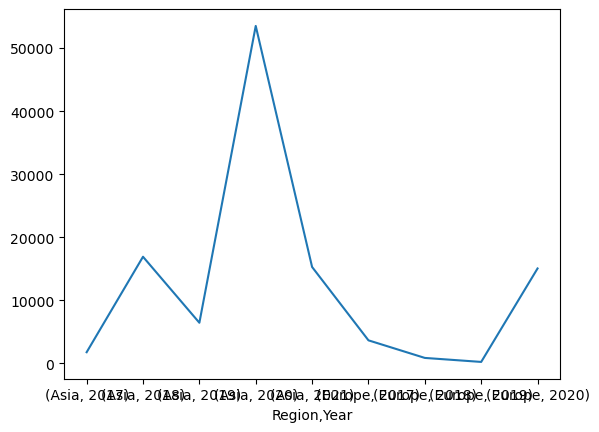

In [14]:
df6.plot(kind = 'line')

In [15]:
df_unstacked = df6.unstack(level =0)
df_unstacked


Region,Asia,Europe
Year,,
2017,1787.0,3670.0
2018,16923.0,883.0
2019,6458.0,249.0
2020,53516.0,15066.0
2021,15299.0,NaN


In [18]:
df_unstacked.index = df_unstacked.index.astype(int).astype(str)

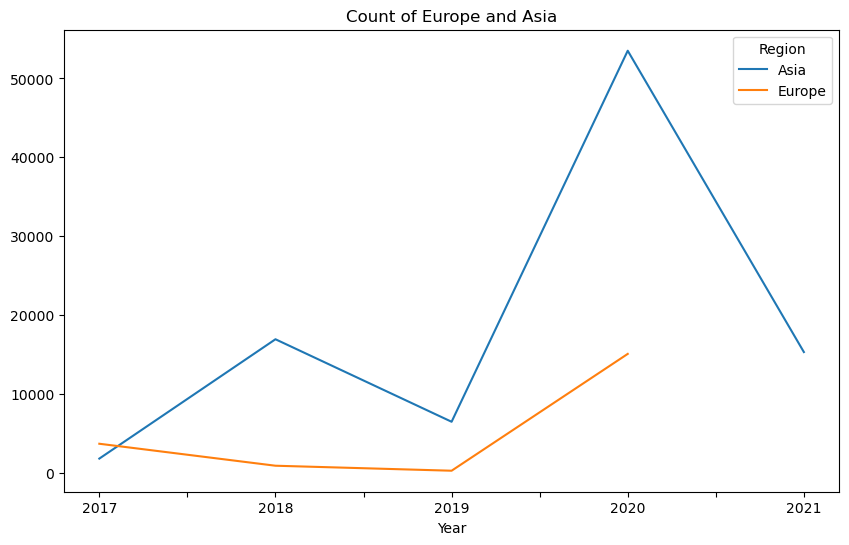

In [20]:
df_unstacked.plot(kind = 'line' ,figsize  =(10,6))
plt.xlabel=('Year')
plt.ylabel=('Count')
plt.title('Count of Europe and Asia')
plt.show()


In [21]:
df7 = df.groupby(['Year'])['Rate'].sum().sort_values(ascending = False)
df7

Year
2020    608.0
2019    161.0
2012    119.5
2016     78.8
2018     70.0
2015     58.5
2014     54.2
2009     39.5
2017     30.3
2021     28.4
2013     21.7
2007     19.0
2010     18.2
2006     12.5
2011     10.1
2008      5.1
Name: Rate, dtype: float64

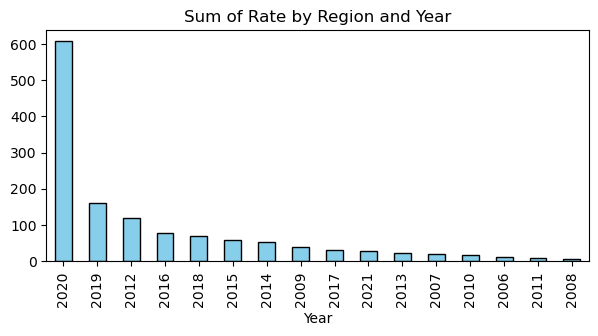

In [27]:
df7.plot(kind = 'bar', figsize = (7,3),color = 'skyblue' ,edgecolor ='black')
plt.xlabel=('Region ,Year')
plt.ylabel=('Sum ofRate')
plt.title('Sum of Rate by Region and Year')
plt.show()







In [41]:
df9 = df [['Year' ,'Region' ,'Count']]
df9 = df8.groupby(['Year','Region','Count']).sum().sort_values(by ='Year', ascending = False).head(40)
df9

Empty DataFrame
Columns: []
Index: [(2021, Asia, 15299), (2020, Africa, 36), (2020, Americas, 1372), (2020, Americas, 2416), (2020, Americas, 3129), (2020, Americas, 3598), (2020, Americas, 11520), (2020, Americas, 21570), (2020, Americas, 36579), (2020, Americas, 47722), (2020, Asia, 2), (2020, Asia, 10), (2020, Asia, 12), (2020, Asia, 14), (2020, Asia, 15), (2020, Asia, 19), (2020, Asia, 22), (2020, Asia, 48), (2020, Asia, 87), (2020, Americas, 1323), (2020, Africa, 35), (2020, Americas, 926), (2020, Americas, 9), (2020, Africa, 303), (2020, Africa, 487), (2020, Africa, 562), (2020, Africa, 580), (2020, Africa, 2151), (2020, Africa, 4460), (2020, Africa, 19846), (2020, Americas, 10), (2020, Americas, 743), (2020, Americas, 14), (2020, Americas, 15), (2020, Americas, 41), (2020, Americas, 480), (2020, Americas, 481), (2020, Americas, 529), (2020, Americas, 570), (2020, Americas, 961)]